In [1]:
import os
import io
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data, specify index so it's easier to join and search using loc
path = '../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'selected_columns_listings.csv')
df = pd.read_csv(listings_csv)

In [3]:
df.drop(columns=['listing_url','name','host_name','host_url','host_url', 'host_since','host_location','host_listings_count',
          'host_listings_count','street','state','market','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms' ], inplace=True)

In [4]:
df['price'] = pd.to_numeric(df.price.str.replace('$',''),errors='coerce')
df['host_response_rate'] = pd.to_numeric(df.host_response_rate.str.replace('%',''),errors='coerce')
df['host_acceptance_rate'] = pd.to_numeric(df.host_acceptance_rate.str.replace('%',''),errors='coerce')
df['host_is_superhost']=df.host_is_superhost.replace(['t','f'],[1,0])
df['host_identity_verified']=df.host_identity_verified.replace(['t','f'],[1,0])
df['is_location_exact']=df.is_location_exact.replace(['t','f'],[1,0])
df['security_deposit'] = pd.to_numeric(df.security_deposit.str.replace('$',''),errors='coerce')
df['cleaning_fee'] = pd.to_numeric(df.cleaning_fee.str.replace('$',''),errors='coerce') 
df['extra_people'] = pd.to_numeric(df.extra_people.str.replace('$',''),errors='coerce')
df['instant_bookable']=df.instant_bookable.replace(['t','f'],[1,0])

In [5]:
df.host_response_rate.fillna(df.host_response_rate.mean(), inplace=True)
df.host_acceptance_rate.fillna(df.host_acceptance_rate.mean(), inplace=True)
df.host_is_superhost.fillna(df.host_is_superhost.mean(), inplace=True)
df.host_identity_verified.fillna(df.host_identity_verified.mean(), inplace=True)
df.is_location_exact.fillna(df.is_location_exact.mean(), inplace=True)
df.security_deposit.fillna(df.security_deposit.mean(),inplace=True)
df.cleaning_fee.fillna(df.cleaning_fee.mean(),inplace=True)
df.extra_people.fillna(df.extra_people.mean(),inplace=True)

In [6]:
#Drop other type of bed - keep just "Real Bed"
df=df.set_index("bed_type")
df.drop(["Airbed","Couch","Futon","Pull-out Sofa"], axis=0,inplace=True)
#Drop Hotel Room from room_type
df=df[df.room_type != 'Hotel room']

In [18]:
df.reset_index(drop=True, inplace=True)

In [8]:
pd.crosstab(df.neighbourhood_group_cleansed,df.room_type,margins=True)

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group_cleansed,,,,
Bronx,431,754,50,1235
Brooklyn,9767,9990,404,20161
Manhattan,13416,7910,451,21777
Queens,2243,3700,194,6137
Staten Island,185,181,5,371
All,26042,22535,1104,49681


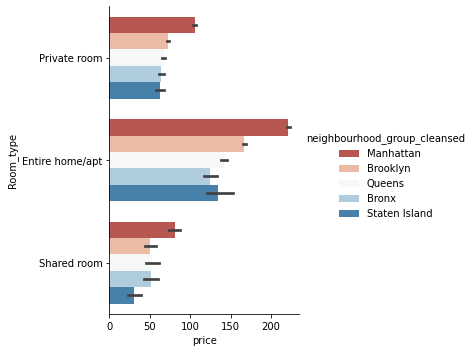

In [9]:
g_1 = sns.catplot(x="price", y="room_type", hue="neighbourhood_group_cleansed", data=df,
              height=5, kind="bar", palette="RdBu")
g_1.despine(left=False)
g_1.set_ylabels("Room_type")

In [10]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [25]:
corr=df.corr()

In [26]:
corr.price

Unnamed: 0                     0.009371
id                             0.008177
host_id                       -0.000374
host_response_rate             0.004972
host_acceptance_rate          -0.011292
host_is_superhost              0.010741
host_total_listings_count      0.125265
host_identity_verified         0.007430
latitude                       0.061096
longitude                     -0.262441
is_location_exact              0.000491
accommodates                   0.529873
bathrooms                      0.272156
bedrooms                       0.398035
beds                           0.401417
price                          1.000000
security_deposit               0.182315
cleaning_fee                   0.458355
guests_included                0.304309
extra_people                   0.071770
minimum_nights                 0.026527
maximum_nights                 0.001891
minimum_minimum_nights         0.026002
maximum_minimum_nights         0.088822
minimum_maximum_nights         0.029655
